# CHAPTER 3. 통계적 실험과 유의성 검정 : 순열 검정, 통계적 유의성 검정 + P값


## 실험 설계의 목표

    실험설계는 모든 응용 연구 분야에 쓰이며, 어떤 가설을 확인하거나 기각하기 위한 목표를 갖는다.
    특히, 데이터과학에서는 지속적으로 어떤 실험을 수행할 때 사용된다.
    


## 전형적인 통계 추론 과정
    1. 가설을 세운다
    2. 실험을 설계한다.
    3. 데이터를 수집한다.
    4. 추론 및 결론을 도출한다.
    
    ex) 약품 A가 기존의 표준 약품보다 낫다 (A/B 검정과 같은) 실험은 가설을 검정하기 위해 설계되고, 원하는 최종
        적인 결론을 도출할 수 있도록 설계된다.
  

## 통계적 기법과 머신/딥러닝의 활용 차이

" 통계적 추론과정에서 통계적 기법은, 실험의 설계와 결과 분석을 위한 기준이고, 머신/딥러닝은 무엇이 가장 좋은가? 가장 최적화된 것에 초점이다."
  
### 통계적 기법
    - 실험 설계 : 이 실험을 유의미하게 하려면 무엇으로 측정할까? -> 표본 설계, 변수, 가설 설정
    - 결과 분석 : 이 결과는 신뢰할 수 있는가? 
                  
### 머신/딥러닝 
    - 실험을 진행하면서 : 지금까지 해본 것 중 무엇이 가장 최적화 됬지?
    - 최종 결정을 내릴 때 : 무엇이 가장 잘 맞지? 예측력이 가장 좋은건? 

## 실전에서 어떻게 쓰이나?
    1. 실험 설계 구조
        1) 질문 : 무엇을 실험할까 ? 어떤 조건으로 비교하고 계획할까 ? 
        2) 목적 : 인가관계 추론을 위한 정교한 실험 설계

    2. 논리 판단 구조
        1) 질문 : 실험 결과가 유의미한가?
        2) 목적 : 관측된 차이나 결과가 우연일 가능성을 평가해서, 우연이 아니면 의미 있는 결과인지 판별

        
    3. 통계적 신뢰 보강 구조
        1) 질문 : 이 결과는 얼마나 신뢰할 수 있는가? 다른 상황에도 적용 가능한가?
        2) 목적 : 실험 결과의 불확실성과 변동성을 줄이고, 일반화 가능성을 높이는 구조(재현성 높임)
  

### 3.1 A/B 검정

#### 용어 정리

      1) A/B검정
      A/B검정은 두 가지 처리 방법, 제품, 절차 중 어느 쪽이 다른 쪽보다 더 우월하다는 것을 입증하기 위해 실험군
      을 두 그룹으로 나누어 진행하는 실험이다. 
      
      2) 처리 (조건)
      어떤 대상에 주어지는 특별한 환경이나 조건(약, 가격, 인터넷 뉴스 제목)
       
      3) 처리군
      특정 처리에 노출된 대상들의 집단
      
      4) 대조군
      처리가 안된 그룹을 대조군
      
      5) 검정통계량 
      가설 검정을 위해 계산된 통계량, 귀무가설이 참일 때 얼마나 극단적인지를 나타낸다.
      (귀무가설 참 = 우연이다 = 유의미하지 않다.)
      T값, Z값, F값, X2값
      
      6) 측정 지표
      모델의 성능이나 결과 측정하는 수치 (예측 정확도, 실험 결과)
      Accuracy, F1-Score, AUC 

#### 주요 개념
    - 연구 대상을 두 가지 이상의 그룹 중 하나에 할당한다. 여기서 서로 다른 처리 조건을 제외한 나머지 조건들은 정확히 동일하게 처리된다.
    - 이상적으로, 대상들은 그룹에 무작위로 배정된다.

#### 3.1.1 A/B 검정 예

      - 종자 발아가 어디에서 더 잘되는지 알아보기 위해 두 가지 토양 처리를 검정한다. 
      - 두 개의 인터넷 뉴스 제목을 검정하여 더 많은 클릭을 생성하는 쪽을 결정한다.
      - 두 개의 인터넷 광고를 검정하여 어느 것이 더 높은 전환율을 얻을지 판단한다. 


#### 3.1.2 A/B 검정은 대상과 무작위 개념을 이해해야 한다.

      1) 대상
      제대로 된 A/B 검정에는 둘 중 어느 한쪽의 처리를 할당할 수 있는 대상이 주어진다.
      (위 예의 종자, 인터넷 뉴스, 광고, 사람 등)
      
      2) 무작위 
      A/B검정의 핵심은 피실험자가 어떤 특정 처리에 노출된다는 것이므로, 피실험자는 무작위로 어느 (조건)처리에 
      할당된다.

#### 3.1.3 대상과 무작위를 통해 얻어진 처리군이 동등하지 않을 수도 있다.
    
    1) 다른 처리의 효과
        - A와 B중 하나가 진짜로 더 나은 결과를 만들어냈기 때문에
        - 새 버튼 디자인(B)이 진짜로 더 많은 클릭을 유도 (대립가설이 참일 가능성, 차이는 유의미)
    
    2) 무작위 배정이 만든 우연한 편향
        - A/B 테스트는 무작위로 사람들(대상)을 나누지만, 완벽하게 똑같은 성향의 사람들을 두 그룹으로 나눌 순 
          없다. (우연히 구매 성향이 높은 사람이 B에 많이 배정) 

#### 3.1.4. A/B 검정 시 검정 통계량 또는 측정지표에 주의를 기울인다.
    -> 미리 정하지 않으면, 실험을 수행한 뒤 연구자 편향이라는 함정에 빠진다.
     
    1) 데이터 과학의 측정 지표는 모델 성능 또는 실험 결과의 성과를 수치로 계산한다.
       목적 : 최적화, 개선 방향 판단 
       - 분류 : Accuracy, Precision, Recall, F1-Score, AUC / 예측이 얼마나 정확한가?
       - 회귀 : RMSE, MAE, R2 / 예측값과 실제값 간의 오차는 어떠한가?
       - 실험/비즈니스 : 클릭률(CTR), 전환율(CVR), 평균 주문금액 / 성과가 어떠한가?
    
    2) 데이터 과학의 검정통계량은,
       두 값의 차이가 우연인지, 혹은 통계적으로 의미가 있는지 판단하기 위해 계산되는 수치다.
       목적 : 유의성 검정 + P값 계산
       
        - 평균 비교 : T통계량(T값) / 평균 차이 검정 사용 (T-TEST)
        - 비율 비교 : Z통계량(Z값) / 비율 차이 검정에 사용 (Z-TEST)
        - 분산 비교 : F통계량(F값) / ANOVA, 분산비 검정
        - 범주형 데이터 : X2통계량(카이제곱값) / 독립성, 적합도 검정
    
        " 검정통계량은 단지 계산된 수치(예: 2.3)일 뿐이며,이를 기준 분포(예: t-분포)에 넣어 
          이보다 더 극단적인 값이 나올 확률을 계산한 것이 바로 p값이다."


#### 3.1.5 대조군은 왜 필요할까?
"대조군 없이, 관심있는 처리를 적용한 그룹에만 실험을 하고, 그 결과를 단순히 이전 경험과 비교해보면 어떨까?"

    문제점) 이전 상황과 지금은 다른 요인이 너무 많을 수 있다.
    1) 그 시기 해커 활동이 줄었거나 2) 국제 정세가 바뀌거나 
    3) 다른 보안 조치(패치, 서버 등)가 동시에 적용됬거나 4) 언론 보도로 해커들이 눈치
    
    대조군이 없다면 '모든 다른 것들은 동일하다'는 보장이 없으며, 어떤 차이가 처리(또는 우연)때문인지 확신할 수 
    없다.
  

#### 3.1.6 왜 하필 A/B일까? C/D가 아니라?

    A/B 테스트는 실험 설계의 출발점이자, 중간 결론을 얻는 장치다. 
    A/B 테스트는 널리 사용되지만, 추가적인 처리가 필요할 순 있다.
    예를 들어, 피실험자를 대상으로 반복 측정을 하는 제약회사의 임상 실험과 같이
    1) 대상이 매우 귀하고 2) 비용이 비싸며 3) 측정에 많은 시간이 필요하다.
    이런 경우, 실험을 중단하고 결론을 얻을 수 있는 중간 장치가 A/B 테스트다.
    
    또한,
    통계적 실험설계의 특정 처리 방법과 데이터 과학의 특정 처리 방법의 차이다.
    통계적 처리 방법은 "가격 A와 가격 B의 차이가 통계적으로 유의미한가?"라는 정적인 질문에 답하고
    데이터 과학은 "가능한 여러 가격 중에서 가장 좋은 가격은 얼마인가?"에 답한다.

### 3.2 가설 검정

    목적 ) 가설 검정 혹은 유의성 검정은 전통적인 통계분석 방법으로, 관찰된 효과가 우연에 의한 것인지 여부를 알
           아낸다.

#### 용어 정리
    1) 귀무 가설 : 우연 때문이라는 가설 (유의어 : 영가설)
    2) 대립 가설 : 귀무가설과의 대조 (증명하고자 하는 가설)
    3) 일원 검정 : 한 방향으로만 우연히 일어날 확률을 계산하는 가설 검정
    4) 이원 검정 : 양 방향으로 우연히 일어날 확률을 계산하는 가설 검정
    5) 임의성 : 어떤 일정한 제한을 받지 않고 마음대로 하는 특성 
    
#### 주요 개념
    1) 귀무가설은 우리가 관찰한 어떤 효과가 특별한 것이 아니고, 우연에 의해 발생한 것이라는 개념을 구체화하는 
       일종의 논리적 구조다.
    2) 귀무가설(H₀)이 맞다고 가정하고, 그에 따라 '기대되는 결과'를 미리 설정한 다음, 지금 관찰한 결과가 정말 
       그 기대 안에 들어오는지를 확인하는 과정이다.
       
       
#### 3.2.1 가설 검정을 왜 세워야할까? 단순히 실험 결과를 보고 더 나은 치료법을 선택하면 안될까?
    임의성을 과소평가하려는 인간의 경향이 있기 때문에, 무작위 데이터를 보고 의미있는 패턴을 갖는 것으로 오해하
    는 경향이 있다. 그래서 통계적 가설검정은 연구자가 랜덤하게 우연히 일어난 일에 속지 않도록 보호하기 위한 방
    법이다.

#### 3.2.2 가설 검정 흐름

    1) 귀무가설(H₀)과 대립가설(H₁)을 설정한다.

        예: H₀ = "A와 B 간 차이는 없다"

        예: H₁ = "A와 B 간 차이가 있다"

    2) 검정통계량을 계산하고,
       이를 기준 분포(t-분포, z-분포 등)에 대입해 p값을 구한다.

    3) 계산된 p값을 통해
       결과가 통계적으로 유의미한지 판단하고,
       그에 따라 귀무가설을 기각하거나 채택한다.
       
 #### 3.2.3 A/B 검정과 가설 검정의 관계
 
    통계 가설검정은 그룹 A와 B 사이에서 보이는 차이가 우연에 의한 것인지를 평가하기 위해 A/B검정에서 더 나아가
    그 외 여러 무작위 실험을 포함하는 분석을 의미한다. 
    
    가설검정(절차)에는 통계적 방법으로, 재표본추출(순열 검정), 통계적 유의성과 P값, T 검정, 다중검정,자유도,
    분산분석, 카이제곱검정, 멀티암드 밴딧 알고리즘, 검정력과 표본크기가 있다.

#### 3.2.4 적절하게 설계된 A/B 검정에서 A/B 사이의 관찰된 차이가 2가지 원인으로 설명된다.

    1) 우연 때문일 수 있다.
    B그룹에 특정한 사람들이 운 좋게 몰려서 생긴 차이일 수도 있다.
    → 그래서 이렇게 준비해야 한다.

    A. 충분한 대상 수를 모으고

    B. 무작위로 나누기 (랜덤하게 A/B 나눔)

    C. 나이, 성별 같은 정보도 같이 수집해서 확인
    
    D. 통계적으로 유의한 차이가 있는지 P값으로 확인 
       - A와 B의 차이는 우연히 생긴 것이다.라는 귀무가설을 기가할 수 있을 정도로 P값이 작다면
         유의미한 차이라고 판단할 수 있다.
         (*기각 : 그건 아니라고 판단하는 것)


    2) B가 진짜로 더 효과가 있을 수 있다.
    B가 진짜로 더 좋은 방법이라 차이가 생긴 걸 수도 있다.

    → 이걸 믿으려면 이런 전략이 필요하다.

    A. 비교할 지표를 미리 정해두고

    B. 중간에 바꾸지 말고 조건을 그대로 유지하고

    C. 반복해서 실험해서 같은 결과가 또 나오는지 확인하기 (매번 P값 확인)
     -> 반복되는 실험에도 귀무가설이 계속 기각된다면 B의 효과는 일관되며 신뢰할 수 있는 결과라고 본다.

### 3.2.1 귀무 가설

#### 3.2.1. 귀무 가설은 가설 검정의 기본 가정이다.

    "인간은 실제로 우연히 발생한 일이라도 그것이 흔하지 않다면, 그것에 뭔가 의미가 있을 것이라고 
     해석하는 경향을 가지고 있다. 
    그러므로, 실험에서 얻은 그룹 간의 차이가 무작위로 얻을 수 있는 합리적인 수준과는 극단적으로 다르다는 증거
    가 필요하다.또한 그룹들이 보이는 결과는 서로 동일하며, 그룹 간의 차이는 우연에 의한 결과라는 것을 기본 가
    정으로 한다."

#### 3.2.2  귀무가설을 기각하려면 ? 
    
    우리가 본 결과가 그냥 우연인지 아닌지 확인하려면 → 재표본추출(순열검정) 같은 통계 기법을 쓴다.
    재표본 추출(순열 검정)은 우연히 생긴 확률(P값)이 아주 작다는 걸 순열 검정을 통해 보여준다.
     


### 3.2.3 대립 가설

#### 3.2.3.1 가설 검정은 그 성격상 귀무가설 뿐만 아니라, 그와 대립하는 가설을 포함한다.

    - 귀무 가설 : 그룹 A와 그룹 B의 평균에는 차이가 없다
      대립 가설 : A는 B와 다르다 (더 크거나 작을 수 있다)
    - 귀무가설 : A <= B
      대립가설 : A> B
    - 귀무가설 : B는 A보다 X% 더 크지 않다.
      대립가설 : B는 A보다 X%크다.
 
 " 결국 귀무가설, 대립가설 모든 가능성을 설명해야 한다. 귀무가설의 본질은 가설검정의 구조를 결정한다. "

### 3.2.4. 일원/이원 가설 검정

#### 3.2.4.1. 일원/이원 가설 검정 뜻

일원 가설검정은 **하나의 원인(요인)**이 결과에 영향을 주는지를 알아보는 방법이다.
예를 들어, 광고 종류(A, B, C)에 따라 클릭률이 다른지를 알고 싶을 때,요인이 '광고 종류' 하나뿐이니까 일원 가설검정을 사용한다.

반면, 이원 가설검정은 **두 개의 원인(요인)**이 결과에 어떤 영향을 주는지를 함께 보는 방법이다.
예를 들어, 광고 종류(A, B, C)와 요일(평일/주말)이 클릭률에 영향을 주는지를 알고 싶을 때,
요인이 '광고 종류'와 '요일' 두 개니까 이원 가설검정을 쓴다.

이원 검정에서는 보통 '광고 종류만의 영향', '요일만의 영향', 그리고 '광고 종류와 요일이 함께 작용해서 생기는 영향(상호작용)'까지 같이 본다는 차이가 있다.


### 3.2.4.2 데이터 과학에서는 일원/이원 가설검정이나 P값을 그렇게까지 중요하게 여기지 않기도 한다.

데이터가 충분히 많아지면, P값은 거의 항상 작게 나와서 통계적으로는 유의미할 수 있지만,
그 차이가 실제로 의미 있는지는 별개의 문제다.

그래서 데이터 과학에서는 P값보다는 **모델 성능 지표(측정지표)**에 더 큰 비중을 두는 경우가 많다.
하지만 그렇다고 해서 P값이 쓸모없다는 뜻은 아니다.

P값은 기본적으로 가설검정에 국한되지만,
측정지표와 함께 사용하면 실험 해석이나 모델 비교에서 훨씬 더 신뢰도 있는 판단을 할 수 있다.



### 3.2.5 측정지표 + 가설검정이 함께 쓰이는 주요 사례

    1. A/B 테스트 성과 비교
     - 측정지표: 클릭률(CTR), 구매율, 평균 체류시간 등
     - 가설검정: “A와 B의 클릭률 차이는 우연일까?”를 P값으로 판단
       → 실험 결과가 우연이 아닌, 실제로 의미 있는 차이인지 확인할 때 꼭 필요하다.

    2. 모델 성능 비교
     - 측정지표: Accuracy, F1-score, ROC-AUC 등
     - 가설검정: 모델 A와 B의 성능 차이가 통계적으로 유의한가?
       → 예: 순열검정으로 두 모델의 AUC 차이에 대한 P값 계산
       → A가 0.91, B가 0.89라고 해도
       → 그 차이가 우연이 아닌지 검정해야 신뢰할 수 있다.

    3. 전처리 또는 특성선택 평가
     - 측정지표: 전처리 전후의 성능 변화 (예: F1-score 상승)
     - 가설검정: “특정 전처리 기법이 실제 성능에 영향을 줬는가?”
       → 예: t검정 또는 부트스트랩 기반 검정으로 확인

    4. 실험군/통제군 비교 (오프라인 실험 포함)
      - 측정지표: 전환율, 유지율, 수익률 등
      - 가설검정: 해당 지표 차이가 유의미한지를 P값과 검정통계량으로 평가
        → 특히 실험군과 통제군을 나눠서 운영하는 리테일, 마케팅 실험에서 자주 사용됨

    결론)
    P값은 무조건 중심이 되는 건 아니지만, 측정지표와 함께 사용하면 결과 해석의 신뢰도를 높일 수 있다.

### 3.2.6.1 순열 검정

#### 용어 정리
    순열 검정 : 두 개 이상의 표본을 함께 결합하여 관측값들을 무작위로(또는 전부를) 
                재표본으로 추출하는 과정을 말한다.
    재표본추출 : 관측 데이터로부터 반복해서 표본추출하는 과정
    복원/비복원 : 표본을 추출할 때, 이미 한 번 뽑은 데이터를 다음번 추출을 위해 
                  다시 제자리에 돌려 놓거나/ 다음 추출에서 제외하는 표본 추출 방법

#### 3.3.6.1.1 순열 검정 알고리즘

    1. 여러 그룹(A~N..)결과를 단일 데이터 집합으로 결합한다.
       (A~D 케이크의 조각의 점수들을 전부 합친다.)
    2. 결합된 데이터를 잘 섞은 후, 그룹 A와 동일한 크기의 표본을 무작위로 (비복원) 추출한다.
       (누가 만든 건지 정보 없이, 그냥 점수만 무작위로 섞는다.)
    3. 나머지 데이터에서 그룹 B와 동일한 크기의 샘플을 무작위로 비복원 추출한다.
       (A가 5조각 만들었으면 B도 5개 조각으로 만든다.)
    4. C,D 등의 그룹에 대해서도 동일한 작업을 수행한다. (원본 표본의 크기를 반영하는 재표본 수집 완료)
    5. 원래 샘플(그룹의 비율 등)에 대해 구한 통계량 또는 추정치가 무엇이었던 간에 지금 추출한 재표본에 대해 모
       두 다시 계산하고 기록한다. 이것으로 순열 반복이 진행된다. (A평균-B평균=차이)
    6. 앞선 단계들을 R번 반복하여 검정통계량의 순열 분포를 얻는다.

#### 3.3.6.1.2 대표적인 검정 통계량

검정통계량/	언제 사용 /	의미

평균(차이)/	t검정, 순열검정, 부트스트랩 등/	그룹 간 평균 차이

분산(차이)/	분산분석(ANOVA)/	그룹 간 퍼짐 정도 비교

비율(차이)/	이항 검정, 전환율 비교 등/	성공률, 클릭률 같은 비율의 차이

카이제곱값/	카이제곱 검정/	기대값과 관측값 간의 거리

회귀계수/	회귀모형에서	독립변수가 결과에 미치는 영향

AUC, F1-score/	모델 성능 비교/	분류 성능 지표

상관계수/	상관관계 검정/	두 변수 간 선형관계의 강도

### 3.3.6.1.3 웹 페이지와 A , B의 세션 시간 평균 차이 : 순열 검정

In [2]:
import pandas as pd

C:\Users\wkdal\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\wkdal\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [9]:
import os

print(os.path.exists('C:/Users/wkdal/Desktop/데이터과학을위한 파이썬/practical-statistics-for-data-scientists-master/practical-statistics-for-data-scientists-master/data/web_page_data.csv'))

True


In [10]:
session_times = pd.read_csv('C:/Users/wkdal/Desktop/데이터과학을위한 파이썬/practical-statistics-for-data-scientists-master/practical-statistics-for-data-scientists-master/data/web_page_data.csv')

In [13]:
session_times.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


Text(0, 0.5, 'Time (in seconds)')

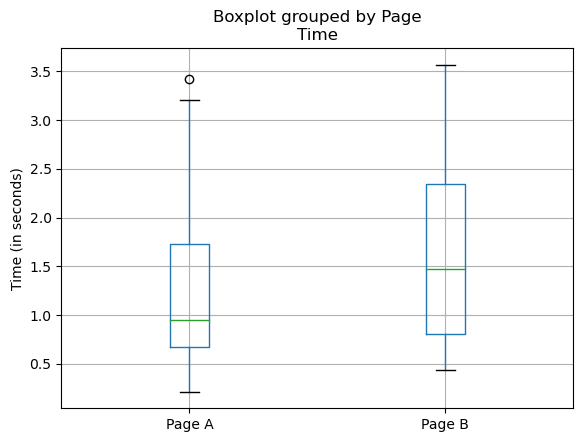

In [11]:
ax = session_times.boxplot(by='Page', column = 'Time')
# 박스플롯 생성 (그룹별 통계 시각화) # Page 기준으로 그룹 나눔 → 페이지마다 하나의 박스
# 박스플롯을 Time 데이터로 그림
ax.set_xlabel('')  
# x축 레이블 제거 기본적으로 by='Page'를 쓰면 Page가 x축 이름으로 자동 붙는데, 그걸 깔끔하게 지워주는 코드
ax.set_ylabel('Time (in seconds)')
# 축 레이블을 'Time (in seconds)'로 설정 즉, y축 값이 시간 단위라는 걸 명확하게 표시

In [12]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
# Page A 사용자들이 머문 **평균 시간(Time)**을 계산해서 mean_a에 저장
#session_times.Page == 'Page A'  Page가 'Page A'인 행만 필터링 , [ ... ] 필터링된 행만 선택
# .Time	그 중에서 'Time' 열만 추출,      .mean()	Time 값들의 평균 계산
print(mean_a)
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b)
mean_b - mean_a

1.2633333333333332
1.62


0.3566666666666669

In [7]:
# 순열 검정 적용 
# 36개의 세션 시간을 21개(페이지 a)와 15개(페이지 b)의 그룹에 랜덤하게 할당하는 기능 필요

def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = random.sample(range(n), nB)
    idx_A = list(set(range(n)) - set(idx_B))
    return x.iloc[idx_B].mean() - x.iloc[idx_A].mean()


이 함수는  비복원추출방식으로 nB개의 표본을 추출하고 그룹 b에 할당한다. 그리고 나머지 na개는 그룹 a에 할당한다. 이 때 평균 차이를 결과로 반환한다. 

random(seq, K개) 비복원으로 K개 무작위 추출

.loc[] 정수가 아닌, 인덱스 값 자체로 찾는 함수

In [13]:
nA = 21  # Page A 샘플 개수
nB = 15  # Page B 샘플 개수

Text(0, 0.5, 'Frequency ')

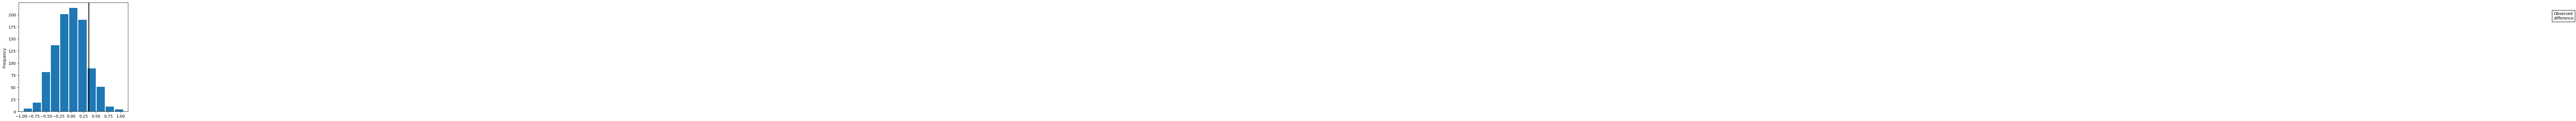

In [15]:
import random
import matplotlib.pyplot as plt
perm_diffs = [perm_fun(session_times["Time"].reset_index(drop=True), nA, nB) for _ in range(1000)]
# 순열 검정 결과를 1000번 반복해서 평균 차이 리스트 생성
fig, ax = plt.subplots(figsize = (5,5))
# 5x5 크기의 빈 플롯(fig), 축 객체(ax) 생성
ax.hist(perm_diffs, bins =11, rwidth = 0.9)
# 순열 평균 차이들을 히스토그램으로 시각화 (11개 구간, 막대 너비 조절)
ax.axvline(x = mean_b - mean_a, color = 'black', lw = 2)
# 관찰된 평균 차이 (B - A)를 세로선으로 표시 → 기준선 역할
ax.text(50, 190, 'Observed\ndifference', bbox = {'facecolor':'white'})
# 기준선 근처에 'Observed difference'라는 텍스트 박스 추가
ax.set_label('Session time differences (in seconds)')
# X축 레이블 지정 (※ set_label → set_xlabel 로 수정해야 합니다!)
ax.set_ylabel('Frequency ')
# Y축 레이블 지정

In [70]:
import numpy as np
np.mean(perm_diffs > ( mean_b - mean_a ))

0.129

### 3.2.6.2 통계적 유의성과 P 값 

##### 전자 상거래 페이지 전환 웹테스트 실험 결과

    결과 / 가격a / 가격b
    전환 / 200 / 182
    전환되지않음 / 23,539 / 22,406
    
##### 전환 + 전환되지 않은 결과
    23739 / 22588

#### 실제 관측된 차이 계산
    0.8425% = 200/ (23539 + 200) * 100대
    
    0.8057% = 182 / (22406+182) * 100대

    둘의 차이 ? 0.0368%

In [1]:
## 실제 관측된 차이 계산
obs_pct_diff = 100 * (200/ 23739 - 182 / 22588)
# 100* 퍼센트로 환산 (a그룹 전환율 - b그룹 전환율) # 전환/전환되지않음
print(f'Observed difference : { obs_pct_diff: .4f}%')

Observed difference :  0.0368%


##### 통계적 유의성 검정을 할 것인가?
    데이터는 45,000개가 넘어서 많아 보이지만, 주로 작은 표본에 변동성을 보는 통계적 유의성이 필요없다고 판단할 
    수 있다. 하지만 전환율이 1%도 안되기 때문에 실제로 전환되는 경우는 200개도 안된다. 데이터가 많아도 진짜 알
    고싶은 정보는 적다
    
    이럴 때, 단순한 통계적 결과(평균)이나 전통적 통계적 검증(카이제곱,t검정 등)을 보기는 어렵다.
    이는, 정규 분포(종 모양), 등분산성( 두 집단의 분산 비슷), 독립성( 각 데이터는 서로 독립), 충분한 표본 수
    (정규분포 가정을 믿을 수 있음)가 뒷받침되어야 하는데, 전환율이 0.0368%로 희소하다.
    이는 조건에 맞지 않아 통계적 검증을 할 수가 없다.
    
    무작위로 데이터를 다시 나누고 전환율의 차이가 우연히 나오는게 아닌지(유의미하게 희소성있는 데이터라고 사용
    할 수 있는지)를 알고싶다면, 통계적 유의성 검정을 시도해야 한다.

#### 순열 검증을 시각화 

Text(0, 0.5, 'Frequency')

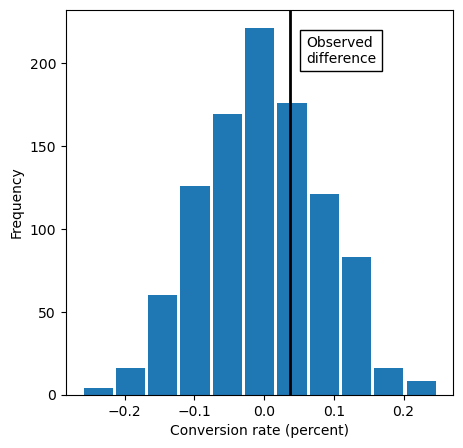

In [20]:
## 전체 전환율 계산
conversion = [0] * 45945  # 45,945개의 0
conversion.extend([1]*382) # 382개의 1
conversion = pd.Series(conversion)  #시리즈로 변환


## 1000번 반복해서 전환율 차이 계산 
perm_diffs = [ 100 * perm_fun(conversion, 23739, 22588) for _ in range(1000)]
# 순열검증(pern_fun)을 1000번 반복

## 시각화 
fig, ax = plt.subplots(figsize=(5,5))
# 빈 플롯, x,y축 생성 
ax.hist(perm_diffs, bins = 11, rwidth = 0.9)
# 전환율 차이를 구간 11개, 넓이 0.9로 시각화
ax.axvline( x=obs_pct_diff, color = 'black', lw = 2)
# x축 색상 검정, 두께 2, 이름
ax.text(0.06, 200, 'Observed\ndifference', bbox = {'facecolor':'white'})
# 텍스트 주석 추가 , 0.06 x좌표 (텍스트가 나타날 위치, 200 y좌표 , 실제 표시될 텍스트, 텍스트 뒤에 흰 배경 박스
# 관측된 전환율 차이 ≈ 0.0367%라서 주석을 0.06에 넣음
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

##### 시각화 결론
    1000개의 재표본추출(permutation)을 통해 계산된 전환율 차이의 분포를 보여준다.

    파란색 막대는 무작위로 나눴을 때 발생한 전환율 차이들이 얼마나 자주 나왔는지 보여준다

    검정 세로선은 실제로 관측된 전환율 차이(0.0368%)를 보여준다.(코드에선 0.06인 근사값으로 해서 가독성있게 보     이려 했다.)

    관측된 전환율 차이(0.0368%)가 이 분포 한가운데나 주변에 있다는 건, 이 정도 차이는 우연히도 자주 나올 수 있     다.는 뜻으로 간주된다.

    (귀무가설인) 전환율의 차이가 희소성 있는지 아닌지의 결론은, 가격 a와 b는 전환율에 차이가 없다 -> 우연히다.      -> 유의미하지않다.

### P값 

#### 전환율 차이가 의미 있는지를 판단하려면, p-값이 필요하다
    그래프는 전환율 차이의 분포를 직관적으로 보여주기에는 유용하지만,
    정량적으로 통계적 유의성을 판단하기 위해서는 p-값과 같은 수치 지표가 반드시 필요하다.

    p-값은 귀무가설 하에서, 관측된 결과보다 더 극단적인 결과가 얼마나 자주 나타나는지를 의미하는 확률값이다.

    다시 말해, **순열검정(permutation test)**에서는
    전체 재표본 결과 중에서 **관측된 전환율 차이와 같거나 더 큰 차이(극단값)**가
    얼마나 자주 나타나는지를 비율로 계산함으로써 p-값을 추정할 수 있다.

    즉, p-값은 "이 정도 극단적인 차이가 우연히도 얼마나 자주 발생하는가?"를 수치로 표현한 값이며,
    이는 관측된 차이가 의미 있는 것인지(유의미한 차이),
    혹은 **우연히 나온 것인지(무의미한 차이)**를 정량적으로 판단할 수 있게 해준다.

     "p-값은 관측된 차이가 통계적으로 의미 있는지를 판단해주는 수치적 근거다."

#### 관측된 전환율 차이, 통계적으로 의미 있을까?

    p-값이 0.308이라는 것은, 귀무가설이 참이라는 전제 하에
    전체 실험 중 약 30.8%에서 지금과 비슷하거나 더 극단적인 전환율 차이가
    우연히도 발생할 수 있다는 의미다.

    따라서 이번 실험에서 관측된 전환율 차이는 우연히 발생했을 가능성이 높으며,
    통계적으로 유의하다고 판단하기는 어렵다.

In [28]:
from scipy.stats import chi2_contingency
#두 범주형 변수 간에 ‘연관이 있는지’를 통계적으로 검정하는 함수
  # (카이제곱 독립성 검정 함수 불러오기)
  # 두 범주형 변수(예: 그룹 A/B, 전환/비전환)가 서로 독립적인지 검정하는 데 사용
import numpy as np # # 배열 및 수치 계산을 위한 NumPy 라이브러리

In [37]:
# 생존자 데이터 (전환 / 비전환)
survivors = np.array([
    [200, 23739 - 200],    # 그룹 A: [전환, 비전환]
    [182, 22588 - 182]     # 그룹 B: [전환, 비전환]
])

# set 리턴값 : 카이제곱 통계량, p값, 자유도 계산 
chi2, p_value, df, _ = stats.chi2_contingency(survivors)
# 순서를 지켜서 아래와 같은 틀로 작성한다.
# (반환값들) chi2 카이제곱 통계량, p	p-값 (유의확률) ,dof	자유도 , _ (언더바) 4번째 expected(기댓값)은 안씀.

# 소수점 아래 4자리까지 출력
print(f'p-value for single sided test : {p_value / 2:.4f}')

p-value for single sided test : 0.3498


#### 결론

    관측된 전환율 차이는 0.0368%포인트로 보였지만,

    순열검정과 카이제곱 검정 결과 모두 p-값이 약 0.3498로 나타났다.

    이는 전체 실험 중 약 35%에서 이 정도 차이가 우연히도 발생할 수 있다는 의미이며, 통계적으로 유의하지 않다.
    
    따라서 이번 실험에서는 가격 변경이 전환율에 유의미한 영향을 미쳤다고 보기 어렵다.